In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stocks = pd.read_csv('TSLA.csv', header=0)
stocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2536,2020-07-27,287.000000,309.588013,282.600006,307.920013,307.920013,80243500
2537,2020-07-28,300.799988,312.940002,294.884003,295.298004,295.298004,79043500
2538,2020-07-29,300.200012,306.962006,297.399994,299.821991,299.821991,47134500
2539,2020-07-30,297.600006,302.648010,294.200012,297.497986,297.497986,38105000


In [4]:
stocks.set_index('Date', inplace = True)
stocks

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2020-07-27,287.000000,309.588013,282.600006,307.920013,307.920013,80243500
2020-07-28,300.799988,312.940002,294.884003,295.298004,295.298004,79043500
2020-07-29,300.200012,306.962006,297.399994,299.821991,299.821991,47134500


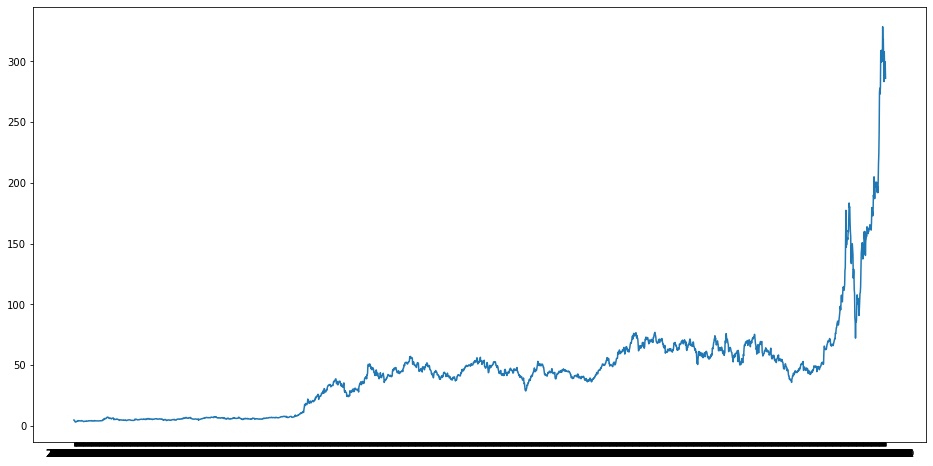

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,8))
plt.plot(stocks['Close'])

In [6]:
data = stocks.filter(['Close']).values

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(data)
scaled_data

array([[0.00497173],
       [0.00493486],
       [0.00378564],
       ...,
       [0.91157198],
       [0.90443086],
       [0.86956736]])

In [9]:
import math
training_data_len = math.ceil(len(scaled_data)*0.8)

In [10]:
train_data = scaled_data[0:training_data_len]
train_data

array([[0.00497173],
       [0.00493486],
       [0.00378564],
       ...,
       [0.17662241],
       [0.17307645],
       [0.18002704]])

In [11]:
x_train = []
y_train = []

PAST_SET = 10

for i in range(PAST_SET, len(train_data)):
    x_train.append(train_data[i-PAST_SET:i, 0])
    y_train.append(train_data[i,0])

In [12]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [14]:
x_train.shape

(2023, 10, 1)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [16]:
x_train.shape[1]

10

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [19]:
model.fit(x_train,y_train, batch_size = 1, epochs = 3)

Epoch 1/3
2023/2023 [==============================] - 8s 4ms/step - loss: 1.6932e-04
Epoch 2/3
2023/2023 [==============================] - 8s 4ms/step - loss: 6.8230e-05
Epoch 3/3
2023/2023 [==============================] - 8s 4ms/step - loss: 5.7829e-05


In [20]:
test_data = scaled_data[training_data_len - PAST_SET:, :]

x_test = []
y_test = data[training_data_len:, :]
for i in range(PAST_SET, len(test_data)):
    x_test.append(test_data[i-PAST_SET:i, 0])

In [21]:
x_test = np.array(x_test)

In [22]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
predictions = model.predict(x_test)

predictions = scalar.inverse_transform(predictions)

In [24]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.1457317052059626

In [25]:
data = stocks.filter(['Close'])

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-25-530ff23f5129>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [26]:
valid

,Close,Predictions
Date,,
2018-07-26,61.330002,66.093979
2018-07-27,59.436001,66.360451
2018-07-30,58.034000,65.352158
2018-07-31,59.627998,64.064110
2018-08-01,60.167999,64.367485
...,...,...
2020-07-27,307.920013,258.327881
2020-07-28,295.298004,271.136963
2020-07-29,299.821991,267.525513


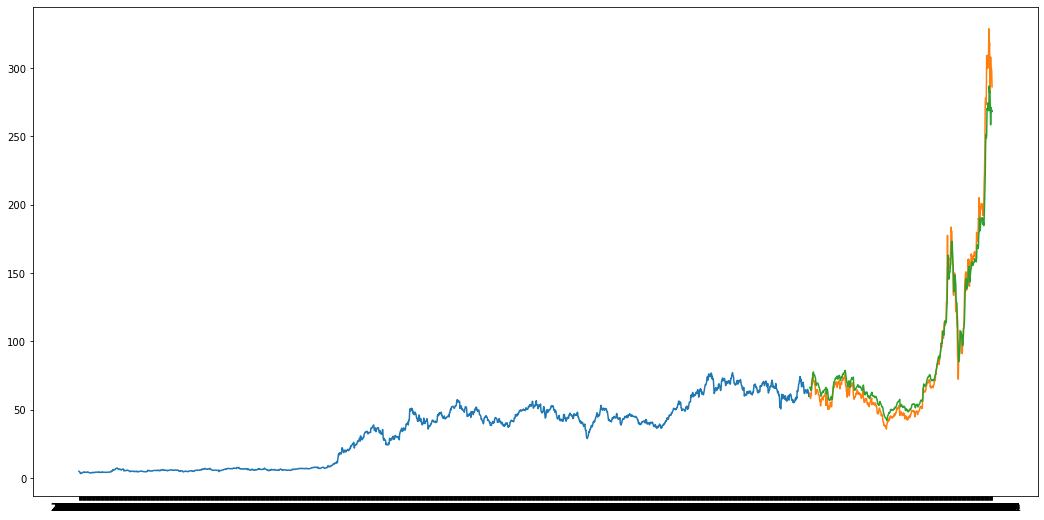

In [27]:
plt.figure(figsize=(18,9))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

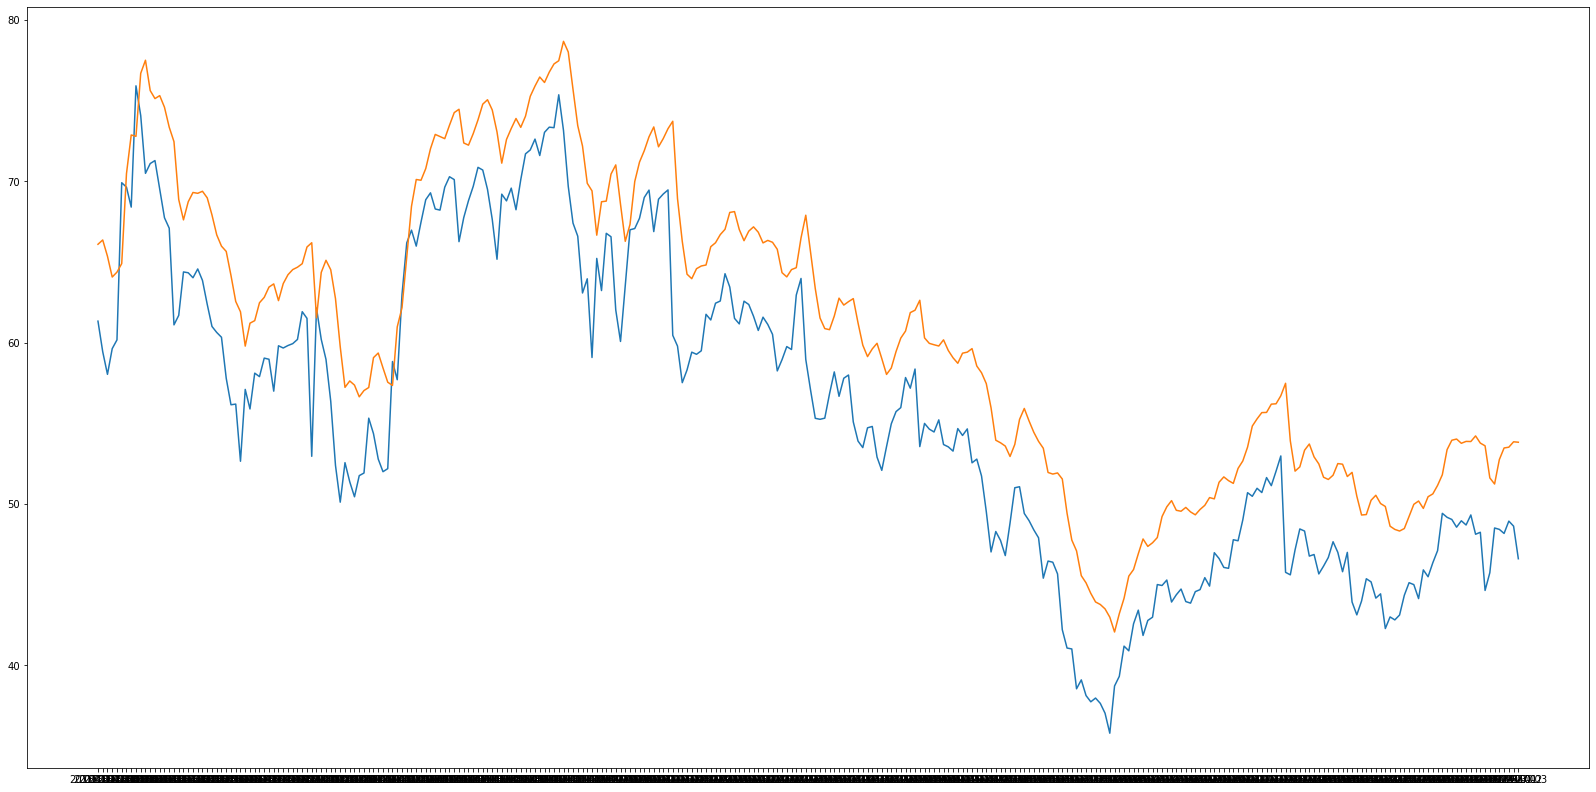

In [28]:
plt.figure(figsize=(28,14))
plt.plot(valid[['Close', 'Predictions']][:300])